In [1]:
!wget -nc http://storage.googleapis.com/download.tensorflow.org/data/spa-eng.zip


--2023-03-18 17:25:17--  http://storage.googleapis.com/download.tensorflow.org/data/spa-eng.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 172.253.122.128, 172.253.63.128, 142.250.31.128, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|172.253.122.128|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2638744 (2.5M) [application/zip]
Saving to: ‘spa-eng.zip’

spa-eng.zip         100%[===================>]   2.52M  --.-KB/s    in 0.01s   

2023-03-18 17:25:17 (214 MB/s) - ‘spa-eng.zip’ saved [2638744/2638744]



In [2]:
!unzip -nq spa-eng.zip

In [3]:
# inspect what we got
!ls

sample_data  spa-eng  spa-eng.zip


In [4]:
# inspect the folder
!ls spa-eng

_about.txt  spa.txt


In [5]:
# Inspect the data
!head spa-eng/spa.txt

Go.	Ve.
Go.	Vete.
Go.	Vaya.
Go.	Váyase.
Hi.	Hola.
Run!	¡Corre!
Run.	Corred.
Who?	¿Quién?
Fire!	¡Fuego!
Fire!	¡Incendio!


In [6]:
# compile eng-spa translations and load in the file in a datastructure sutible for our needs
eng2spa = {}
for line in open('spa-eng/spa.txt'):
  line = line.rstrip()
  eng, spa = line.split("\t")
  if eng not in eng2spa:
    eng2spa[eng] = []
  eng2spa[eng].append(spa)

In [7]:
# print the dictionary
eng2spa

{'Go.': ['Ve.', 'Vete.', 'Vaya.', 'Váyase.'],
 'Hi.': ['Hola.'],
 'Run!': ['¡Corre!'],
 'Run.': ['Corred.'],
 'Who?': ['¿Quién?'],
 'Fire!': ['¡Fuego!', '¡Incendio!', '¡Disparad!'],
 'Help!': ['¡Ayuda!', '¡Socorro! ¡Auxilio!', '¡Auxilio!'],
 'Jump!': ['¡Salta!'],
 'Jump.': ['Salte.'],
 'Stop!': ['¡Parad!', '¡Para!', '¡Pare!'],
 'Wait!': ['¡Espera!'],
 'Wait.': ['Esperen.'],
 'Go on.': ['Continúa.', 'Continúe.'],
 'Hello!': ['Hola.'],
 'I ran.': ['Corrí.', 'Corría.'],
 'I try.': ['Lo intento.'],
 'I won!': ['¡He ganado!'],
 'Oh no!': ['¡Oh, no!'],
 'Relax.': ['Tomátelo con soda.'],
 'Smile.': ['Sonríe.'],
 'Attack!': ['¡Al ataque!', '¡Atacad!'],
 'Get up.': ['Levanta.'],
 'Go now.': ['Ve ahora mismo.'],
 'Got it!': ['¡Lo tengo!'],
 'Got it?': ['¿Lo pillas?', '¿Entendiste?'],
 'He ran.': ['Él corrió.'],
 'Hop in.': ['Métete adentro.'],
 'Hug me.': ['Abrázame.'],
 'I fell.': ['Me caí.'],
 'I know.': ['Yo lo sé.'],
 'I left.': ['Salí.'],
 'I lied.': ['Mentí.'],
 'I lost.': ['Perdí.'],
 'I 

In [8]:
# Import function to compute the blue-score
from nltk.translate.bleu_score import sentence_bleu, SmoothingFunction

In [9]:
# import tokenizer because blue-score works with tokens
from nltk.tokenize import RegexpTokenizer

tokenizer = RegexpTokenizer(r'\w+')

In [10]:
# Test the tokenizer
tokenizer.tokenize('Deme una cerveza grande por favor'.lower())

['deme', 'una', 'cerveza', 'grande', 'por', 'favor']

In [11]:
# Test our bleu-score function
tokens = tokenizer.tokenize('Deme una cerveza grande por favor'.lower())
sentence_bleu([tokens], tokens)

1.0

In [12]:
# Consider the bleu-score for a single token
sentence_bleu([['hi']], ['hi'])

/usr/local/lib/python3.9/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.9/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.9/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg

1.821831989445342e-231

In [13]:
# Try the bleu-score again with a smotthing-function
smoother = SmoothingFunction()
sentence_bleu(['hi'], 'hi', smoothing_function=smoother.method4)

0.2213885886251307

In [14]:
# 
sentence_bleu(['hi there'.split()], 'hi there'.split())

1.491668146240062e-154

In [15]:
# 
sentence_bleu(['hi there friend'.split()], 'hi there friend'.split())

1.2213386697554703e-77

In [16]:
# Integers work aswell
sentence_bleu([[1,2,3,4]], [1,2,3,4])

1.0

In [17]:
# pre-tokenize our target for later use
eng2spa_tokens = {}
for eng, spa_list in eng2spa.items():
  spa_list_tokens = []
  for text in spa_list:
    tokens = tokenizer.tokenize(text.lower())
    spa_list_tokens.append(tokens)
  eng2spa_tokens[eng] = spa_list_tokens

In [18]:
# install transformers with a package
!pip install transformers sentencepiece transformers[sentencepiece]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.7/6.7 MB 78.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.3/1.3 MB 73.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.6/7.6 MB 46.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 199.2/199.2 KB 22.8 MB/s eta 0:00:00


In [19]:
# Instiante our pipline object
from transformers import pipeline
translator = pipeline('translation',
                      model='Helsinki-NLP/opus-mt-en-es', device=0)

/usr/local/lib/python3.9/dist-packages/transformers/models/marian/tokenization_marian.py:194: UserWarning: Recommended: pip install sacremoses.
  warnings.warn("Recommended: pip install sacremoses.")


In [20]:
# Test our translator
translator("One big beer please")

[{'translation_text': 'Una cerveza grande, por favor.'}]

In [21]:
# Check how many englishphrases we have
eng_phrases = list(eng2spa.keys())
len(eng_phrases)

102904

In [22]:
# Select one thousand phrases to trnslate instead of 100k wich is to much for the computer capability
eng_phrases_subset = eng_phrases[20_000:21_000]

In [23]:
# Translate the phrases, it takse about 7 min
translations = translator(eng_phrases_subset)

In [24]:
# print out the first translation to check the format, each translation is a dictionary with a single entry
translations[0]

{'translation_text': 'Tom está en el jardín.'}

In [25]:
# Compute the blue-score for each translation we got back
scores = []
for eng, pred in zip(eng_phrases_subset, translations):
  matches = eng2spa_tokens[eng]

  # tokenize translation
  spa_pred = tokenizer.tokenize(pred['translation_text'].lower())

  score = sentence_bleu(matches, spa_pred)
  scores.append(score)

/usr/local/lib/python3.9/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 3-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.9/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 4-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg)
/usr/local/lib/python3.9/dist-packages/nltk/translate/bleu_score.py:552: UserWarning: 
The hypothesis contains 0 counts of 2-gram overlaps.
Therefore the BLEU score evaluates to 0, independently of
how many N-gram overlaps of lower order it contains.
Consider using lower n-gram order or use SmoothingFunction()
  warnings.warn(_msg

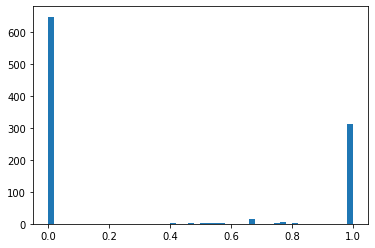

In [26]:
# Plot a histogram of our scores
import matplotlib.pyplot as plt
plt.hist(scores, bins=50);

In [27]:
# Copute the average score
import numpy as np
np.mean(scores)

0.3383504014386889

In [30]:
# Print a few sample translations
np.random.seed(1)
def print_random_translation():
  i = np.random.choice(len(eng_phrases_subset))
  eng = eng_phrases_subset[i]
  print("EN:", eng)

  translation = translations[i]['translation_text']
  print("ES Translation:", translation)

  matches = eng2spa[eng]
  print("Matches", matches)

In [31]:
# Try this ut
print_random_translation()

EN: Tom isn't that young.
ES Translation: Tom no es tan joven.
Matches ['Tom no es tan joven.']


In [32]:
# 
print_random_translation()

EN: Tom's Mary's brother.
ES Translation: Tom es el hermano de Mary.
Matches ['Tom es el hermano de Mary.']
